Original Time (ps): min = 0, max = 999000000
Converted Time (ms): min = 0.0 ms, max = 0.9990000000000001 ms

Fit Results:
A = 510
τ = 0.1885 ± 0.0011 ms
C = 7.7


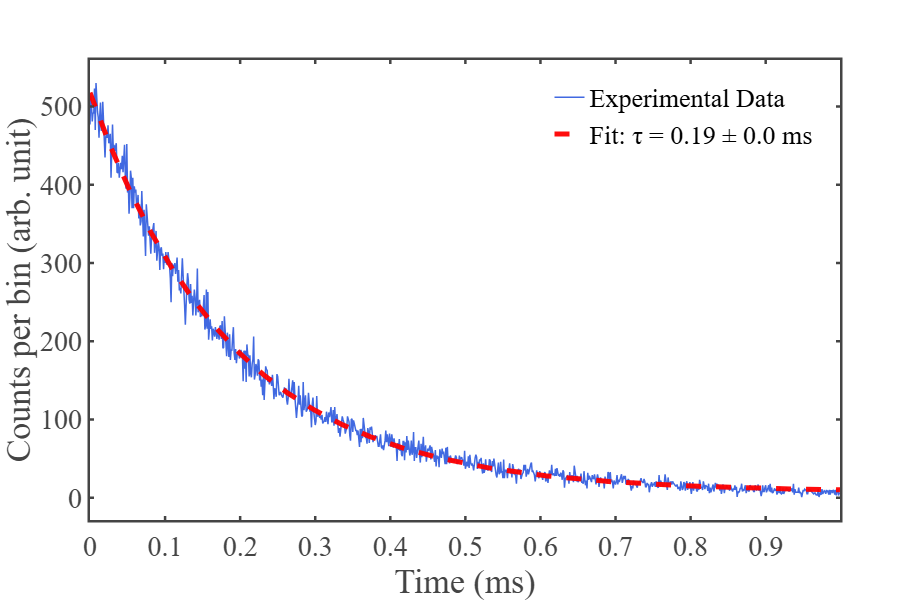

In [11]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.optimize import curve_fit

# --- File path ---
file_path = r"C:\Users\Atanu\OneDrive\Desktop\research_work\paper\NaBiF4_PL_analysis\datas\6th Oct NaBiF4\1064nm_3.86mW_same_polarization\partial side on\lifetime measurements with 975nm\975nm_20mW.txt"

# --- Define exponential decay function with offset ---
def exp_decay(t, A, tau, C):
    return A * np.exp(-t / tau) + C

# --- Read data ---
data = pd.read_csv(file_path, sep=None, engine='python')

# --- Sanity: show original time range (assumed in ps) ---
orig_min = data["Time (ps)"].min()
orig_max = data["Time (ps)"].max()
print(f"Original Time (ps): min = {orig_min}, max = {orig_max}")

# --- Convert time from ps to ms ---
data["Time (ms)"] = data["Time (ps)"] * 1e-9

conv_min = data["Time (ms)"].min()
conv_max = data["Time (ms)"].max()
print(f"Converted Time (ms): min = {conv_min} ms, max = {conv_max} ms")

x = data["Time (ms)"].values
y = data["Counts per bin"].values

# --- Initial guesses for fitting (A, tau, C) ---
A_guess = y.max() - y.min()
tau_guess = (x[-1] - x[0]) / 5.0
C_guess = y.min()

# --- Curve fitting ---
try:
    popt, pcov = curve_fit(exp_decay, x, y, p0=[A_guess, tau_guess, C_guess], maxfev=20000)
    A_fit, tau_fit_ms, C_fit = popt  # τ in ms
    tau_std_ms = np.sqrt(np.abs(pcov[1, 1])) if pcov is not None else np.nan
except Exception as e:
    print("⚠️ Fit did not converge or raised an error:", e)
    A_fit, tau_fit_ms, C_fit = np.nan, np.nan, np.nan
    tau_std_ms = np.nan

# --- Print results ---
print(f"\nFit Results:")
print(f"A = {A_fit:.3g}")
print(f"τ = {tau_fit_ms:.4g} ± {tau_std_ms:.2g} ms")
print(f"C = {C_fit:.3g}")

# --- Generate fitted curve ---
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = exp_decay(x_fit, A_fit, tau_fit_ms, C_fit)

# --- Custom Plotly Template ---
fig_template = go.layout.Template()
fig_template.layout = {
    'template': 'simple_white+presentation',
    'autosize': False,
    'width': 800,
    'height': 600,
    'xaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 2.5,
        'tickwidth': 2.5,
        'ticklen': 4,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
        # 'titlefont': dict(size=34),
        # 'tickfont': dict(size=30),
    },
    'yaxis': {
        'ticks': 'inside',
        'mirror': 'ticks',
        'linewidth': 2.5,
        'tickwidth': 2.5,
        'ticklen': 4,
        'showline': True,
        'showgrid': False,
        'zerolinecolor': 'white',
        # 'titlefont': dict(size=34),
        # 'tickfont': dict(size=30),
    },
    'font': {'family': 'mathjax', 'size': 30}
}

# --- Create figure ---
fig = go.Figure()

# --- Experimental Data ---
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='lines',
    name='Experimental Data',
    line=dict(width=1.5, color='royalblue'),
    marker=dict(size=6, color='royalblue', symbol='circle', opacity=0.6, line=dict(width=1.5, color='darkblue')),
    showlegend=True
))

# --- Fitted Curve ---
fig.add_trace(go.Scatter(
    x=x_fit,
    y=y_fit,
    mode='lines',
    name=f'Fit: τ = {tau_fit_ms:.2g} ± {np.round(tau_std_ms,2)} ms',
    line=dict(color='red', width=5, dash='dash'),
    opacity=0.95
))

# --- Layout styling ---
fig.update_layout(
    template=fig_template,
    xaxis_title="Time (ms)",
    yaxis_title="Counts per bin (arb. unit)",
    width=800,
    height=600,
    margin=dict(l=90, r=60, t=60, b=80),
    plot_bgcolor='white',
    xaxis=dict(range=[x.min(), x.max()]),
    legend=dict(
        font=dict(size=26, family='Times New Roman', color='black'),
        x=0.97, y=0.97,
        xanchor='right', yanchor='top',
    ),
    font=dict(family='Times New Roman', size=28)
)

fig.show()